In [296]:
import seaborn as sns
import pandas as pd
import csv
import os
import matplotlib
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
matplotlib.use("pdf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("magma", 2))

In [297]:
df = pd.read_csv("results_local_episodes.csv")
df.columns = ["Local Episodes", "Trial", "Epoch", 
                         "Average Device Train Accuracy", "Average Device Validation Accuracy"]
df

,Local Episodes,Trial,Epoch,Average Device Train Accuracy,Average Device Validation Accuracy
0,1,0,0,0.400,0.5575
1,1,0,1,0.425,0.4575
2,1,0,2,0.625,0.5675
3,1,0,3,0.575,0.5900
4,1,0,4,0.575,0.5650
...,...,...,...,...,...
23995,6,19,195,0.800,0.8325
23996,6,19,196,0.900,0.8550
23997,6,19,197,0.975,0.8425
23998,6,19,198,0.925,0.8500


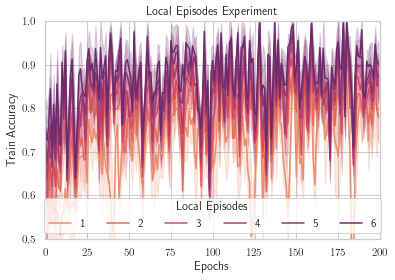

In [298]:
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.set_ylim([0.5,1.0])
ax1.set_xlim([0,200])
sns.lineplot(
    data=df, x="Epoch", y="Average Device Train Accuracy", 
    hue="Local Episodes", ci="sd", palette=sns.color_palette("flare", 6),
    ax=ax1).set(title='Local Episodes Experiment', 
                                                 ylabel = "Train Accuracy",
                                                 xlabel = "Epochs")
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, title="Local Episodes")
fig1.savefig('figures/local-train.pdf', bbox_inches='tight')

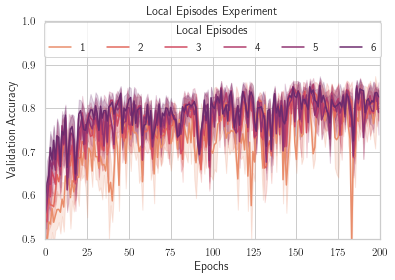

In [299]:
fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.set_ylim([0.5,1.0])
ax2.set_xlim([0,200])
sns.lineplot(
    data=df, x="Epoch", y="Average Device Validation Accuracy", 
    hue="Local Episodes", ci="sd", palette=sns.color_palette("flare", 6),
                        ax=ax2).set(title='Local Episodes Experiment', 
                                                 ylabel = "Validation Accuracy",
                                                 xlabel = "Epochs")
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, 0.81), ncol=6, title="Local Episodes")
fig2.savefig('figures/local-val.pdf', bbox_inches='tight')

In [300]:
df_comparison = pd.read_csv("results_comparison.csv")

for index, row in df_comparison.iterrows():
    if(row['fl']-1 == 0):
        df_comparison.at[index, 'epoch'] = row["epoch"]*2*20
    else:
        df_comparison.at[index, 'epoch'] = row["epoch"]*20
df_comparison.columns = ["Pretrained", "Federated Learning", "Trial", "Epoch", 
                         "Average Device Train Accuracy", "Average Device Validation Accuracy"]
df_comparison

,Pretrained,Federated Learning,Trial,Epoch,Average Device Train Accuracy,Average Device Validation Accuracy
0,0,0,0,0,0.700,0.6200
1,0,0,0,20,0.800,0.6300
2,0,0,0,40,0.700,0.6600
3,0,0,0,60,0.950,0.7350
4,0,0,0,80,0.850,0.6350
...,...,...,...,...,...,...
11995,1,1,9,7800,0.800,0.8050
11996,1,1,9,7840,0.825,0.7150
11997,1,1,9,7880,0.925,0.8275
11998,1,1,9,7920,0.875,0.8425


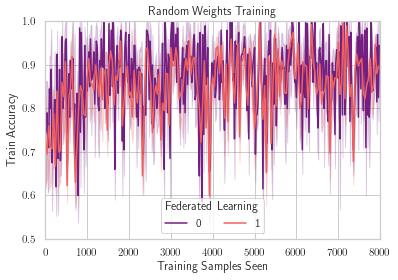

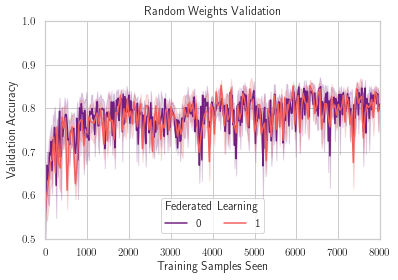

In [309]:
fig3, ax3 = plt.subplots(figsize=(6,4))
ax3.set_ylim([0.5,1.0])
ax3.set_xlim([0,8000])
condition = df_comparison['Pretrained'] == 0

sns.lineplot(
    data=df_comparison[condition], x="Epoch", y="Average Device Train Accuracy", 
    hue="Federated Learning", ci="sd",
    ax=ax3).set(title='Random Weights Training', 
                ylabel = "Train Accuracy",
                xlabel = "Training Samples Seen")
ax3.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, title="Federated Learning")


fig5, ax5 = plt.subplots(figsize=(6,4))
ax5.set_ylim([0.5,1.0])
ax5.set_xlim([0,8000])
condition = df_comparison['Pretrained'] == 0

sns.lineplot(
    data=df_comparison[condition], x="Epoch", y="Average Device Validation Accuracy", 
    hue="Federated Learning", ci="sd",
    ax=ax5).set(title='Random Weights Validation', 
                ylabel = "Validation Accuracy",
                xlabel = "Training Samples Seen")
ax5.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, title="Federated Learning")

fig3.savefig('figures/comparison-random-train.pdf', bbox_inches='tight')
fig5.savefig('figures/comparison-random-val.pdf', bbox_inches='tight')

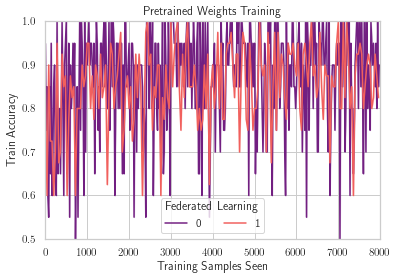

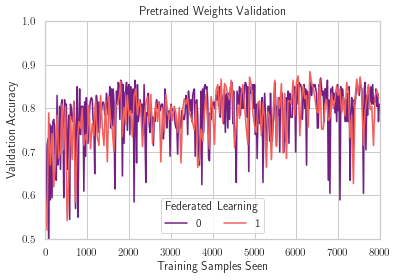

In [302]:

fig4, ax4 = plt.subplots(figsize=(6,4))
ax4.set_ylim([0.5,1.0])
ax4.set_xlim([0,8000])
condition = df_comparison['Pretrained'] == 1

sns.lineplot(
    data=df_comparison[condition], x="Epoch", y="Average Device Train Accuracy", 
    hue="Federated Learning", ci="sd",
    ax=ax4).set(title='Pretrained Weights Training', 
                ylabel = "Train Accuracy",
                xlabel = "Training Samples Seen")
ax4.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, title="Federated Learning")

fig6, ax6 = plt.subplots(figsize=(6,4))
ax6.set_ylim([0.5,1.0])
ax6.set_xlim([0,8000])
condition = df_comparison['Pretrained'] == 1

sns.lineplot(
    data=df_comparison[condition], x="Epoch", y="Average Device Validation Accuracy", 
    hue="Federated Learning", ci="sd",
    ax=ax6).set(title='Pretrained Weights Validation', 
                ylabel = "Validation Accuracy",
                xlabel = "Training Samples Seen")
ax6.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, title="Federated Learning")

fig4.savefig('figures/comparison-pretrain-train.pdf', bbox_inches='tight')
fig6.savefig('figures/comparison-pretrain-val.pdf', bbox_inches='tight')

In [303]:
df_batch = pd.read_csv("results_batch_episodes.csv")

for index, row in df_batch.iterrows():
    df_batch.at[index, 'epoch'] = row["epoch"]*row["batches"]*2
    
df_batch.columns = ["Batch Size", "Trial", "Epoch", 
                         "Average Device Train Accuracy", "Average Device Validation Accuracy"]

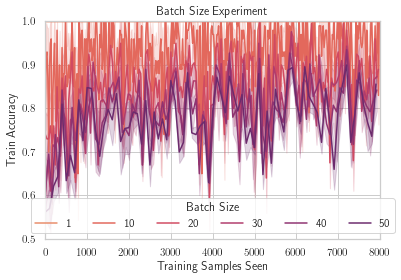

In [304]:
fig7, ax7 = plt.subplots(figsize=(6,4))
ax7.set_ylim([0.5,1.0])
ax7.set_xlim([0,8000])
sns.lineplot(
    data=df_batch, x="Epoch", y="Average Device Train Accuracy", 
    hue="Batch Size", ci="sd", palette=sns.color_palette("flare", 6),
    ax=ax7).set(title='Batch Size Experiment', 
                                                 ylabel = "Train Accuracy",
                                                 xlabel = "Training Samples Seen")
ax7.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, title="Batch Size")
fig7.savefig('figures/batch-train.pdf', bbox_inches='tight')

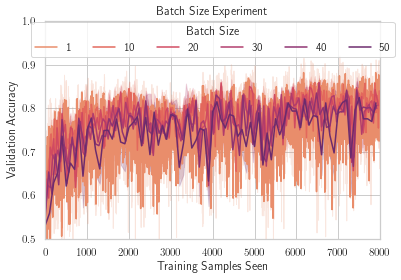

In [305]:
fig8, ax8 = plt.subplots(figsize=(6,4))
ax8.set_ylim([0.5,1.0])
ax8.set_xlim([0,8000])
sns.lineplot(
    data=df_batch, x="Epoch", y="Average Device Validation Accuracy", 
    hue="Batch Size", ci="sd", palette=sns.color_palette("flare", 6),
                        ax=ax8).set(title='Batch Size Experiment', 
                                                 ylabel = "Validation Accuracy",
                                                 xlabel = "Training Samples Seen")
ax8.legend(loc='lower center', bbox_to_anchor=(0.5, 0.81), ncol=6, title="Batch Size")
fig8.savefig('figures/batch-val.pdf', bbox_inches='tight')

In [306]:
df_dev = pd.read_csv("results_device_episodes.csv")

for index, row in df_dev.iterrows():
    df_dev.at[index, 'epoch'] = row["epoch"]*row["devices"]*20

df_dev.columns = ["Devices", "Trial", "Epoch", 
                         "Average Device Train Accuracy", "Average Device Validation Accuracy"]
df_dev

,Devices,Trial,Epoch,Average Device Train Accuracy,Average Device Validation Accuracy
0,1,0,0,0.700000,0.620000
1,1,0,20,0.800000,0.630000
2,1,0,40,0.700000,0.660000
3,1,0,60,0.950000,0.735000
4,1,0,80,0.850000,0.635000
...,...,...,...,...,...
6425,9,9,7020,0.866667,0.792778
6426,9,9,7200,0.877778,0.790556
6427,9,9,7380,0.822222,0.738889
6428,9,9,7560,0.811111,0.791667


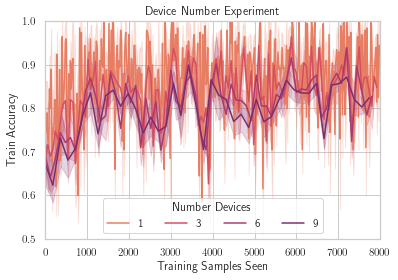

In [307]:
fig9, ax9 = plt.subplots(figsize=(6,4))
ax9.set_ylim([0.5,1.0])
ax9.set_xlim([0,8000])
sns.lineplot(
    data=df_dev, x="Epoch", y="Average Device Train Accuracy", 
    hue="Devices", ci="sd", palette=sns.color_palette("flare", 4),
    ax=ax9).set(title='Device Number Experiment', 
                                                 ylabel = "Train Accuracy",
                                                 xlabel = "Training Samples Seen")
ax9.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6, title="Number Devices")
fig9.savefig('figures/device-train.pdf', bbox_inches='tight')

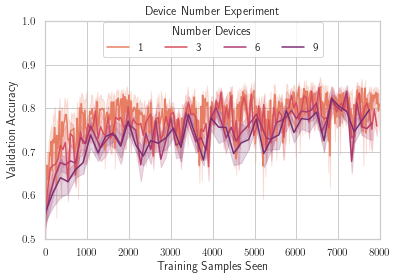

In [308]:
fig10, ax10 = plt.subplots(figsize=(6,4))
ax10.set_ylim([0.5,1.0])
ax10.set_xlim([0,8000])
sns.lineplot(
    data=df_dev, x="Epoch", y="Average Device Validation Accuracy", 
    hue="Devices", ci="sd", palette=sns.color_palette("flare", 4),
                        ax=ax10).set(title='Device Number Experiment', 
                                                 ylabel = "Validation Accuracy",
                                                 xlabel = "Training Samples Seen")
ax10.legend(loc='lower center', bbox_to_anchor=(0.5, 0.81), ncol=6, title="Number Devices")
fig10.savefig('figures/devices-val.pdf', bbox_inches='tight')